> Created on Mon Dec 18 11:43:44 2017  @author: Richie Bao-caDesign设计(cadesign.cn) __+updated on Sun Jul 19 15:12:45 2020 by Richie Bao

## 1. 简单回归，多元回归
在相关性分析一章计算了两两之间的相关系数，但在相关系数计算中并没有区分自变量（independent variable）或预测变量（predictor variable）亦或解释变量，与因变量(dependent variable)或结果变量（outcome variable）亦或效标变量（criterion variable），而回归分析除了可以反映变量间关系的性质和强度，更主要的目的是可以根据自变量预测因变量，其预测的准确程度取决于相关的程度，相关性越强，预测就越准确。根据自变量的数量可以将回归分为简单回归和多元回归，多元回归包括两个或两个以上的自变量及一个因变量，那么这多个自变量作为一个整体与因变量有多大关系，做为个体，各个自变量与因变量的关系强度如何，同时，自变量之间的相对强度又如何，以及自变量之间是否存在交互效应等，回答上述问题后，基本就解释了自变量和因变量之间的关系。


回归涉及的内容异常丰富，回归的类型丰富多彩，在实际应用回归来预测因变量时，并不会从最基础的开始一步步计算，而是直接使用python中集成的库，这时就涉及到了著名的机器学习库[scikit-learn](https://scikit-learn.org/stable/index.html)，该库包含了数据的预处理、降维、分类模型、聚类模型和回归模型，以及模型选择等内容，能够帮助我们处理众多城市空间数据分析问题。同时也可以使用[statsmodels](https://www.statsmodels.org/stable/index.html)库等。当然，一开始就使用集成的模型，对于我们理解回归，乃至任何统计学的知识点或者数据分析的算法都是不利的，往往造成囫囵吞枣、一知半解的弊病，因此亦然一步步，从最为基础的部分，借助python语言来把这个脉络梳理清楚。

> 该部分参考文献：
> 1. [日]高桥 信著作,Inoue Iroha,株式会社 TREND-PRO漫画制作,张仲恒译.漫画统计学之回归分析[M].科学出版社.北京.2009.08；
> 2. Timothy C.Urdan.Statistics in Plain English(白话统计学)[M].中国人民大学出版社.2013,12.第3版.
> 3. Douglas C.Montgomery,Elizabeth A.Peck,G.Geoffrey Vining著.王辰勇译.线性回归分析导论(Introduction to linear regression analysis).机械工业出版社.2016.04(第5版)

### 1.1 预备的知识——反函数

#### 1.1.1 反函数（inverse function）
如果函数$f(x)$有$y=f(x)$，$f$是y关于自变量x的函数；如果存在一个函数$g$，使得，$g(y)=g(f(x))=x$，则$g$是x关于自变量y的函数，称$g$为$f$的反函数。若一函数有反函数，此函数变为可逆的。可记作函数$f$和它的反函数$f^{-1} $。假设函数$f=2*x+1$，则$x=(f/2-1/2)$，替换$x$为$f^{-1}$，$f$为$x$，则结果为反函数$f^{-1}=x/2-1/2$。在下述代码表述假设函数及其反函数时，使用了[sympy](https://docs.sympy.org/latest/index.html)代数计算库，轻量型的SymPy的语法方式保持了python语言本身的形式，使得数学公示的表述和计算上清晰简便。打印图表$f$和它的反函数$f^{-1} $，可以看到，二者的相对横纵坐标发生了置换。求一个函数的反函数，当前有很多在线自动转换的平台，可以搜索输入公式获得其反函数的公式。例如[Symbolab](https://www.symbolab.com/)，如果$f(x)= \frac{ x^{2} +x+1}{x} $,则其反函数为$g(x)= \frac{-1+x+ \sqrt{ x^{2}-2x-3 } }{2} $，及$g(x)= \frac{-1+x- \sqrt{ x^{2}-2x-3 } }{2} $

使用pprint方式打印公式：
 2        
x  + x + 1
──────────
    x     


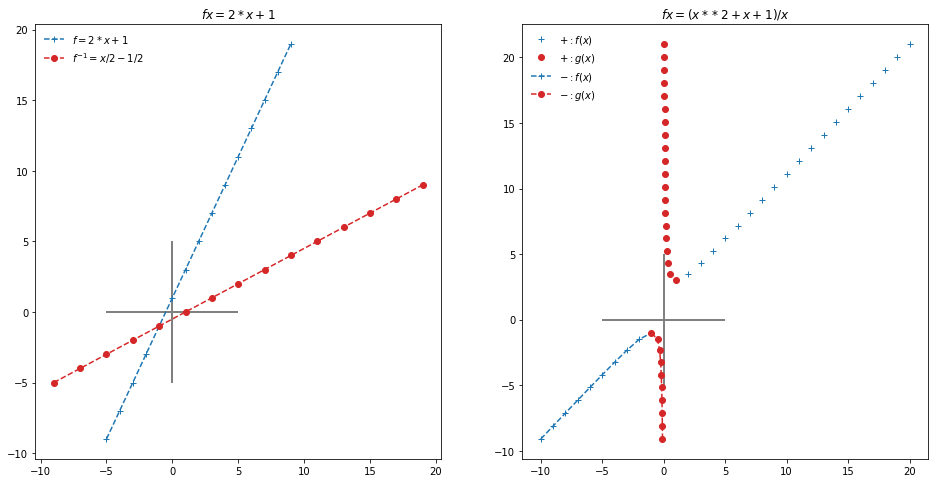

JupyterLab直接输出公式:g_B_negative=


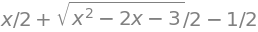

In [83]:
import sympy
from sympy import init_printing,pprint,sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

init_printing() #sympy提供有多种公式打印模式

#示例-A
# 定义字符
x=sympy.Symbol('x')

# 定义表达式
f=2*x+1 #函数fx
g=x/2-1/2 #fx的反函数

#转换表达式为等价的numpy函数实现数值计算
x_array=np.arange(-5,10)
f_=sympy.lambdify(x,f,"numpy")
g_=sympy.lambdify(x,g,"numpy")

#求解函数并绘制图表
fig, axs=plt.subplots(1,2,figsize=(16,8))
axs[0].plot(x_array,f_(x_array),'+--',color='tab:blue',label='$f=2*x+1$')
axs[0].plot(f_(x_array),g_(f_(x_array)),'o--',color='tab:red',label='$f^{-1}=x/2-1/2$')

axs[0].set_title('$fx=2*x+1$')
axs[0].legend(loc='upper left', frameon=False)
axs[0].hlines(y=0,xmin=-5,xmax=5,lw=2,color='gray')
axs[0].vlines(x=0,ymin=-5,ymax=5,lw=2,color='gray')


#示例-B
f_B=(x**2+x+1)/x
print("使用pprint方式打印公式：")
pprint(f_B,use_unicode=True) #使用pprint方式打印公式
g_B_negative=(-1+x+sqrt(x**2-2*x-3))/2
g_B_positive=(-1+x-sqrt(x**2-2*x-3))/2

f_B_=sympy.lambdify(x,f_B,"numpy")
g_B_positive_=sympy.lambdify(x,g_B_positive,"numpy")
g_B_negative_=sympy.lambdify(x,g_B_negative,"numpy")

x_B_array=np.arange(-10,21)
x_B_array_positive=x_B_array[x_B_array>0]
axs[1].plot(x_B_array_positive,f_B_(x_B_array_positive),'+',color='tab:blue',label='$+:f(x)$')
axs[1].plot(g_B_positive_(f_B_(x_B_array_positive)),f_B_(x_B_array_positive),'o',color='tab:red',label='$+:g(x)$')

x_B_array_negative=x_B_array[x_B_array<0]
axs[1].plot(x_B_array_negative,f_B_(x_B_array_negative),'+--',color='tab:blue',label='$-:f(x)$')
axs[1].plot(g_B_negative_(f_B_(x_B_array_negative)),f_B_(x_B_array_negative),'o--',color='tab:red',label='$-:g(x)$')

axs[1].hlines(y=0,xmin=-5,xmax=5,lw=2,color='gray')
axs[1].vlines(x=0,ymin=-5,ymax=5,lw=2,color='gray')
axs[1].legend(loc='upper left', frameon=False)
axs[1].set_title('$fx=(x**2+x+1)/x$')

plt.show()
print("JupyterLab直接输出公式:g_B_negative=")
g_B_negative #用JupyterLab直接输出公式

#### 1.1.2 指数函数与自然对数函数
指数函数(Exponential function)是形式为$b^{x} $的数学函数，其中$b$是底数（或称基数，base）,而$x$是指数（index/exponent）。

对数（logarithm）是幂运算的逆运算，假如$x=b^{y} $，则有$y=log_{b}x $，其中$b$是对数的底（或称基数），而$y$就是$x$对于底数$b$，$x$的对数。典型的底数有$e$、10或2

自然对数（Natural logarithm）为以数学常数$e$为底数的对数函数，标记为$lnx$或$log_{e}x $，其反函数为指数函数$e^{x}$。

* 指数函数与对数函数的性质：

1. $( e^{a} )^{b} = e^{ab} $
2. $\frac{ e^{a} }{ e^{b} } = e^{a-b} $
3. $a=log( e^{a} )$
4. $log(a^{b} )=b \times (loga)$
5. $loga+logb=log(a \times b)$

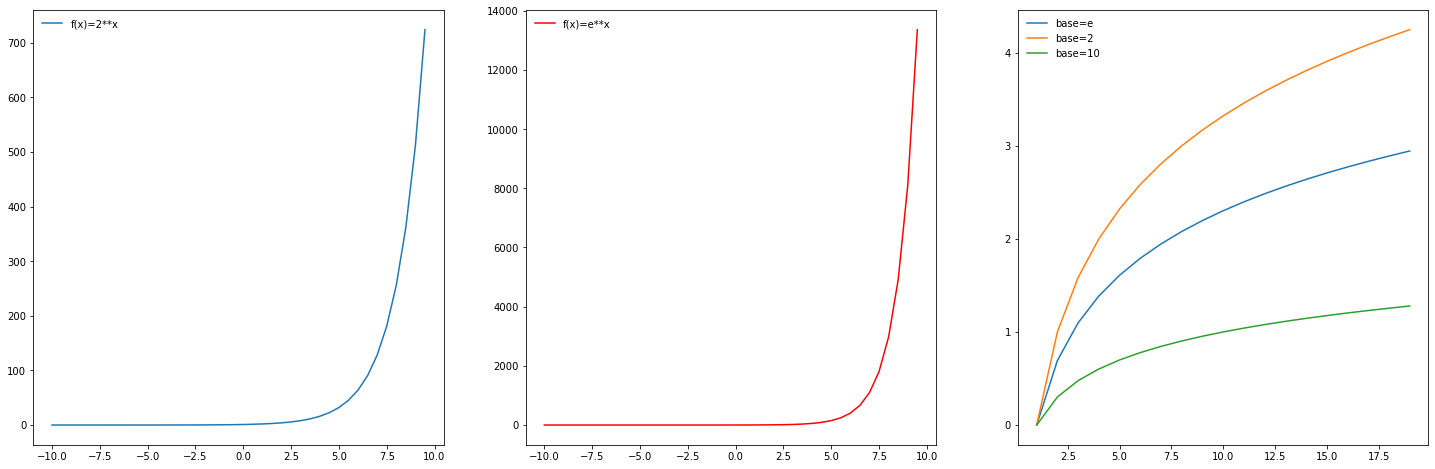

In [2]:
import math
from sympy import ln,log,Eq
x=sympy.Symbol('x')
f_exp=2**x
f_exp_=sympy.lambdify(x,f_exp,"numpy")

fig, axs=plt.subplots(1,3,figsize=(25,8))
exp_x=np.arange(-10,10,0.5,dtype=float)
axs[0].plot(exp_x,f_exp_(exp_x),label="f(x)=2**x")
axs[0].legend(loc='upper left', frameon=False)

f_exp_e=math.e**x
f_exp_e_=sympy.lambdify(x,f_exp_e,"numpy")
axs[1].plot(exp_x,f_exp_e_(exp_x),label="f(x)=e**x",color='r')
axs[1].legend(loc='upper left', frameon=False)

log_x=np.arange(1,20,dtype=float)
f_ln=ln(x) 
f_ln_=sympy.lambdify(x,f_ln,"numpy")
axs[2].plot(log_x,f_ln_(log_x),label='base=e')

f_log_2=log(x,2)
f_log_2_=sympy.lambdify(x,f_log_2,"numpy")
axs[2].plot(log_x,f_log_2_(log_x),label="base=2")

f_log_10=log(x,10)
f_log_10_=sympy.lambdify(x,f_log_10,"numpy")
axs[2].plot(log_x,f_log_10_(log_x),label="base=10")
axs[2].legend(loc='upper left', frameon=False)

plt.show()

#### 1.1.3 微分
微分是对函数的局部变化率的一种线性描述。其可以近似的描述当函数自变量的取值足够小时的改变时，函数的值是怎样变化的。首先根据‘漫画统计学之回归分析’中美羽的年龄和身高数据建立数据集，实现计算年龄和身高的相关系数，结果p_value<0.05，即pearson's r=0.942的相关系数能够说明年龄和身高直接存在强相关关系。既然二者之间存在相关性，就可以建立回归方程，在下述代码中给出了三种回归模型（方程），一种是‘漫画统计学之回归分析’给出的$f(x)=- \frac{326.6}{x}+173.3 $方程，另外两种是直接使用sklearn库Linear Models线性模型中的LinearRegression线性回归，和基于LinearRegression的Polynomial regression多项式回归。关于Sklearn的语法规则，可以参考官方网站scikit-learn给出的指南，Sklearn的语法结构秉承了python自身的特点，具有很强的易读性，代码编写流畅自然。三种回归模型中，以多项式回归拟合的最好，‘漫画统计学之回归分析’中给出的公式次之，而简单粗暴的简单线性回归因为呈现线性，与真实值近似对数函数曲线的形状相异。

$y=- \frac{326.6}{x}+173.3 $关于x求微分，即是求$x$岁到$x$岁之后极短时间内，身高的年平均增长量（自变量以年为单位），$\frac{(- \frac{326.6}{x+ \triangle }+173.3 )-(- \frac{326.6}{x} +173.3)}{ \triangle } = \frac{326.6}{ x^{2} } $，对于微分的计算，可以直接使用sympy提供的`diff`工具计算，计算结果记作$\frac{dy}{dx}= \frac{df}{dx}  = y'= f' = \frac{326.6}{ x^{2} }  $。

* 常用公式求微分：

1. $y=x$，关于$x$进行微分， $\frac{dy}{dx}=1$
2. $y= x^{2} $，关于$x$进行微分，$\frac{dy}{dx}=2x$
3. $y= \frac{1}{x} $，关于$x$进行微分，$\frac{dy}{dx}=- x^{-2} $
4. $y= \frac{1}{ x^{2} } $，关于$x$进行微分，$\frac{dy}{dx}=- 2x^{-3} $
5. $y= (5x-7)^{2} $，关于$x$进行微分，$\frac{dy}{dx}=2(5x-7)\times 5 $
6. $y= (ax+b)^{n} $，关于$x$进行微分，$\frac{dy}{dx}=n (ax+b)^{n-1} \times a  $
7. $y= e^{x} $，关于$x$进行微分，$\frac{dy}{dx}=e^{x}$
8. $y=logx$，关于$x$进行微分，$\frac{dy}{dx}=\frac{1}{x} $
9. $y=log(ax+b)$，关于$x$进行微分，$\frac{dy}{dx}=\frac{1}{ax+b}  \times a $ 
10. $y=log(1+ ea^{x+b} )$，关于$x$进行微分，$\frac{dy}{dx}=\frac{1}{1+ e^{ax+b} }  \times a e^{ax+b}  $

在代码的领域里直接用sympy的diff方法，或其它库提供的方法计算。

pearson's r: 0.9422225583501309 
 p_value: 4.943118398567093e-08
slop:3.78,intercept:94.82
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
f_emma=-326.6/x+173.3关于x求微分：
326.6
─────
   2 
  x  


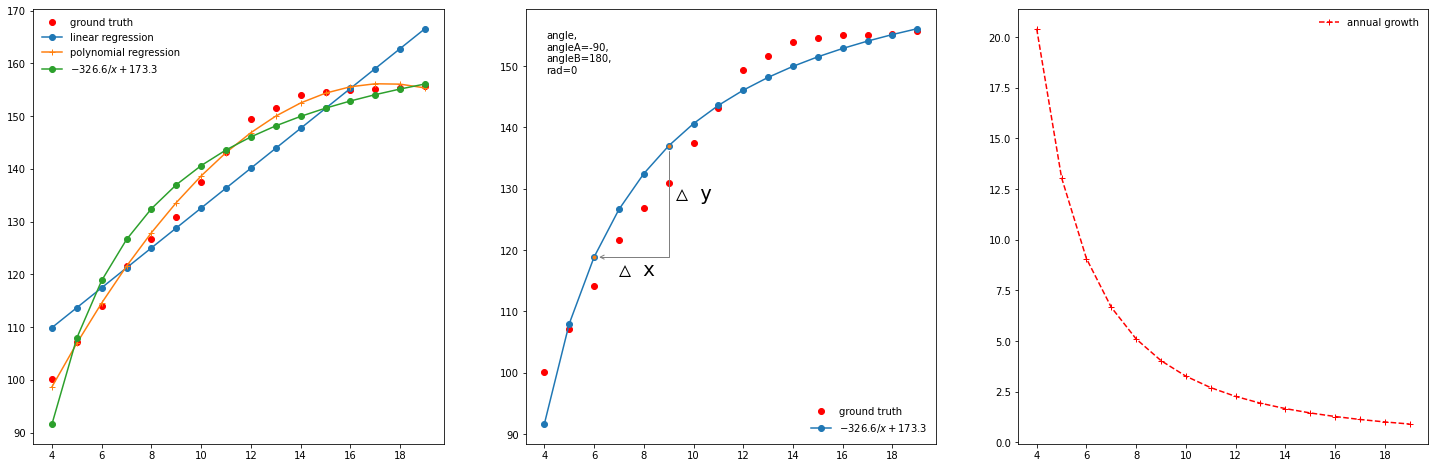

In [3]:
import pandas as pd
from scipy import stats
emma_statureAge={"age":list(range(4,20)),"stature":[100.1,107.2,114.1,121.7,126.8,130.9,137.5,143.2,149.4,151.6,154.0,154.6,155.0,155.1,155.3,155.7]}
emma_statureAge_df=pd.DataFrame(emma_statureAge)

r_=stats.pearsonr(emma_statureAge_df.age,emma_statureAge_df.stature)
print(
    "pearson's r:",r_[0],"\n",
    "p_value:",r_[1]
     )

#原始数据散点图
fig, axs=plt.subplots(1,3,figsize=(25,8))
axs[0].plot(emma_statureAge_df.age,emma_statureAge_df.stature,'o',label='ground truth',color='r')

#A - 使用sklearn库sklearn.linear_model.LinearRegression()，Ordinary least squares Linear Regression-普通最小二乘线性回归，获取回归方程
from sklearn.linear_model import LinearRegression
X=emma_statureAge_df.age.to_numpy().reshape(-1,1)
y=emma_statureAge_df.stature.to_numpy()

#拟合模型
LR=LinearRegression().fit(X,y)

#模型参数
print("slop:%.2f,intercept:%.2f"%(LR.coef_, LR.intercept_))
print(LR.get_params())

#模型预测
axs[0].plot(emma_statureAge_df.age,LR.predict(X),'o-',label='linear regression')

#B - 多项式回归 Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model=Pipeline([('poly', PolynomialFeatures(degree=2)),
                ('linear', LinearRegression(fit_intercept=False))])
reg=model.fit(X,y)
axs[0].plot(emma_statureAge_df.age,reg.predict(X),'+-',label='polynomial regression')

#C - 使用'漫画统计学之回归分析'给出的公式
from sympy import Symbol
x=Symbol('x')
f_emma=-326.6/x+173.3
f_emma_=sympy.lambdify(x,f_emma,"numpy")
axs[0].plot(emma_statureAge_df.age,f_emma_(emma_statureAge_df.age),'o-',label='$-326.6/x+173.3$')


#
axs[1].plot(emma_statureAge_df.age,emma_statureAge_df.stature,'o',label='ground truth',color='r')
axs[1].plot(emma_statureAge_df.age,f_emma_(emma_statureAge_df.age),'o-',label='$-326.6/x+173.3$')

def demo_con_style(a_coordi,b_coordi,ax,connectionstyle):
    '''
    function - 在matplotlib的子图中绘制连接线
    reference - matplotlib官网Connectionstyle Demo
    
    Paras:
    a_coordi - a点的x，y坐标
    b_coordi - b点的x，y坐标
    ax - 子图
    connectionstyle - 连接线的形式
    '''
    x1, y1=a_coordi[0],a_coordi[1]
    x2, y2=b_coordi[0],b_coordi[1]

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")

dx=3
demo_con_style((6,f_emma.evalf(subs={x:6})),(6+dx,f_emma.evalf(subs={x:6+dx})),axs[1],"angle,angleA=-90,angleB=180,rad=0")    
axs[1].text(7, f_emma.evalf(subs={x:6})-3, "△ x", family="monospace",size=20)
axs[1].text(9.3, f_emma.evalf(subs={x:9.3})-10, "△ y", family="monospace",size=20)

#用sympy提供的diff方法求微分
from sympy import diff
print("f_emma=-326.6/x+173.3关于x求微分：")
pprint(diff(f_emma),use_unicode=True) 
diff_f_emma_=sympy.lambdify(x,diff(f_emma),"numpy")
axs[2].plot(emma_statureAge_df.age,diff_f_emma_(emma_statureAge_df.age),'+--',label='annual growth',color='r')

axs[2].legend(loc='upper right', frameon=False)
axs[1].legend(loc='lower right', frameon=False)
axs[0].legend(loc='upper left', frameon=False)
plt.show()

#### 1.1.4 矩阵
一个$m \times n$的矩阵是一个由$m$行（row）$n$列（column）元素排列成的矩形阵列。矩阵里的元素可以是数字、符号或数学式。例如：$\begin{bmatrix}1 & 9&-13 \\20 & 5 &-6\end{bmatrix} $，如果$\begin{cases} x_{1}+2 x_{2}=-1  \\3 x_{1}+ 4x_{2}=5  \end{cases} $可以写作：$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}  \begin{bmatrix} x_{1}  \\ x_{2} \end{bmatrix} = \begin{bmatrix}-1 \\5 \end{bmatrix} $，而如果$\begin{cases} x_{1}+2 x_{2} \\3 x_{1}+ 4x_{2} \end{cases}$，可以写作：$\begin{bmatrix}1 & 2 \\3 & 4 \end{bmatrix}  \begin{bmatrix} x_{1}  \\ x_{2} \end{bmatrix} $ 。

矩阵的操作和运算可以直接应用sympy库的Matrices部分方法，或者其它库。更多的内容需要参考官方教程，此处不再赘述。

In [4]:
from sympy import Matrix,init_printing,pprint
init_printing()
M_a=Matrix([[1, -1], [3, 4], [0, 2]])
pprint(M_a)

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦


### 1.2 简单线性回归
在统计学中，线性回归（linear regression）是利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。只有一个自变量的情况称为简单（线性）回归（simple linear regression），大于一个自变量情况的叫多元回归（multivariable linear regression）。

* 回归分析的流程:

1. 为了讨论十分具有求解回归方程的意义，画出自变量和因变量的散点图；
2. 求解回归方程；
3. 确认回归方程的精度；
4. 进行回归系数的检验；
5. 总体回归$Ax+b$的估计；
6. 进行预测

#### 1.2.1 建立数据集
使用'漫画统计学之回归分析'中最高温度（$^{\circ}C$）与冰红茶销售量(杯)的数据，首先建立基于DataFrame格式的数据集，该数据集使用了时间戳（timestamp）作为索引。

In [38]:
import pandas as pd
import util
from scipy import stats

dt=pd.date_range('2020-07-22', periods=14, freq='D')
dt_temperature_iceTeaSales={"dt":dt,"temperature":[29,28,34,31,25,29,32,31,24,33,25,31,26,30],"iceTeaSales":[77,62,93,84,59,64,80,75,58,91,51,73,65,84]}
iceTea_df=pd.DataFrame(dt_temperature_iceTeaSales).set_index("dt")
util.print_html(iceTea_df,14)

,temperature,iceTeaSales
dt,,
2020-07-22,29,77
2020-07-23,28,62
2020-07-24,34,93
2020-07-25,31,84
2020-07-26,25,59
2020-07-27,29,64
2020-07-28,32,80
2020-07-29,31,75
2020-07-30,24,58


#### 1.2.2求解回归方程
求解回归方程使用了两种方法，一种是逐步计算的方式；另一种是直接使用sklearn库的LinearRegression模型。逐步计算的方式可以更为深入的理解回归模型，而熟悉基本计算过程之后，直接应用sklearn机器学习库中的模型也会对各种参数的配置有个比较清晰的了解。首先计算温度与销量之间的相关系数，确定二者之间存在关联，其p_value=7.661412804450245e-06，小于0.05的显著性水平，确定pearson's r=0.90能够表明二者之间是强相关性。 

求解回归方程即是使所有真实值与预测值之差的和为最小，求出a和b，就是所有变量残差`residual`的平方`s_residual`的和`S_residual`为最小。因为温度与销量为线性相关，因此使用一元一次方程式：$y=ax+b$，$x$为自变量温度，$y$为因变量销量，$a$和$b$为回归系数（参数），分别称为斜率（slop）和截距(intercept)，求解a和b的过程，可以使用最小二乘法（least squares method），又称最小平方法，通过最小化误差的平方（残差平方和）寻找数据的最佳函数匹配。为残差平方和：$(−34𝑎−𝑏+93)^{2} +(−33𝑎−𝑏+91)^{2}+(−32𝑎−𝑏+80)^{2}+(−31𝑎−𝑏+73)^{2}+(−31𝑎−𝑏+75)^{2}+(−31𝑎−𝑏+84)^{2}+(−30𝑎−𝑏+84)^{2}+(−29𝑎−𝑏+64)^{2}+(−29𝑎−𝑏+77)^{2}+(−28𝑎−𝑏+62)^{2}+(−26𝑎−𝑏+65)^{2}+(−25𝑎−𝑏+51)^{2}+(−25𝑎−𝑏+59)^{2}+(−24𝑎−𝑏+58)^{2}$， 

先对$a$和$b$分别求微分$\frac{df}{da} $和$\frac{df}{db} $，是$\triangle a$即$a$在横轴上的增量，及$\triangle b$即$b$在横轴上的增量趋近于无穷小，无限接近$a$和$b$时，因变量的变化量，这个因变量就是残差平方和的值。残差平方和的值是由$a$和$b$确定的，当$a$和$b$取不同的值时，残差平方和的值随之变化，当残差平方和的值为0时，说明由自变量温度所有值通过回归方程预测的销量，与真实值的差值之和为0；单个温度值通过回归模型预测的销量与真实值之差则趋于0。在实际计算中，手工推算时，对残差平方和关于$a$和$b$求微分，是对公式进行整理，最终获得求解回归方程回归系数的公式为：$a= \frac{ S_{xy} }{ S_{xx} } $其中$S_{xy}$即变量`SS_xy`是$x$和$y$的离差积，$S_{xx}$即变量`SS_x`是$x$的离差平方和。求得$a$后，可以根据推导公式：$b= \overline{y} - \overline{x} a$计算$b$。

在python语言中，使用相关库则可以避免上述繁琐的手工推导过程，在逐步计算中，使用sympy库约简残差平方和公式为：$12020⋅a^{2}   + 816⋅a⋅b - 60188⋅a + 14⋅b^{2}  - 2032⋅b + 75936$， 并直接分别对$a$和$b$微分，获得结果为：$ \frac{df}{da} =24040⋅a + 816⋅b - 60188$和$ \frac{df}{db} =816⋅a + 28⋅b - 2032$，另二者分别为0，使用sympy库的solve求解二元一次方程组，计算获取$a$和$b$值。

最后使用sklearn库的LinearRegression模型求解决回归模型，仅需要几行代码，所得结果与上述同。可以用sklearn返回的参数，建立回归方程公式，但是在实际的应用中并不会这么做，而是直接应用以变量形式代表的回归模型直接预测值。

__________________________________________________
pearson's r: 0.9069229780508894 
 p_value: 7.661412804450245e-06
__________________________________________________
S_residual simplification(Binary quadratic equation):
       2                           2                 
12020⋅a  + 816⋅a⋅b - 60188⋅a + 14⋅b  - 2032⋅b + 75936
__________________________________________________
diff_S_residual_a=
24040⋅a + 816⋅b - 60188


diff_S_residual_b=
816⋅a + 28⋅b - 2032
__________________________________________________
slop and intercept:

⎧   1697     -8254 ⎫
⎨a: ────, b: ──────⎬
⎩   454       227  ⎭
__________________________________________________
derivation formula to calculate the slop= 3.7378854625550666
derivation formula to calculate the intercept= -36.361233480176224
__________________________________________________
linear regression_fx=:

1697⋅x   8254
────── - ────
 454     227 
__________________________________________________
Sklearn slop:3.74,intercept:-36.36


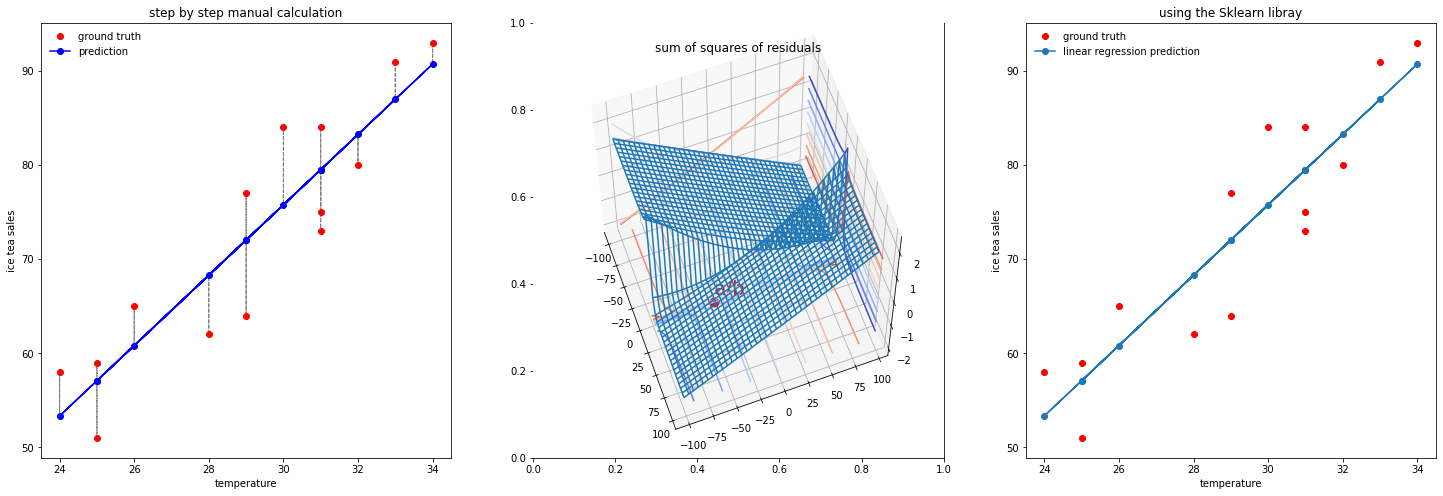

,temperature,iceTeaSales,x_deviation,y_deviation,S_x_deviation,S_y_deviation,S_xy_deviation,prediciton,residual,s_residual
dt,,,,,,,,,,
2020-07-22,29,77,-0.142857,4.428571,0.020408,19.612245,-0.632653,29*a + b,-29*a - b + 77,(-29*a - b + 77)**2
2020-07-23,28,62,-1.142857,-10.571429,1.306122,111.755102,12.081633,28*a + b,-28*a - b + 62,(-28*a - b + 62)**2
2020-07-24,34,93,4.857143,20.428571,23.591837,417.326531,99.224490,34*a + b,-34*a - b + 93,(-34*a - b + 93)**2
2020-07-25,31,84,1.857143,11.428571,3.448980,130.612245,21.224490,31*a + b,-31*a - b + 84,(-31*a - b + 84)**2
2020-07-26,25,59,-4.142857,-13.571429,17.163265,184.183673,56.224490,25*a + b,-25*a - b + 59,(-25*a - b + 59)**2
2020-07-27,29,64,-0.142857,-8.571429,0.020408,73.469388,1.224490,29*a + b,-29*a - b + 64,(-29*a - b + 64)**2
2020-07-28,32,80,2.857143,7.428571,8.163265,55.183673,21.224490,32*a + b,-32*a - b + 80,(-32*a - b + 80)**2
2020-07-29,31,75,1.857143,2.428571,3.448980,5.897959,4.510204,31*a + b,-31*a - b + 75,(-31*a - b + 75)**2
2020-07-30,24,58,-5.142857,-14.571429,26.448980,212.326531,74.938776,24*a + b,-24*a - b + 58,(-24*a - b + 58)**2


In [39]:
import math
import sympy
from sympy import diff,Eq,solveset,solve,simplify
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

r_=stats.pearsonr(iceTea_df.temperature,iceTea_df.iceTeaSales)
print("_"*50)
print(
    "pearson's r:",r_[0],"\n",
    "p_value:",r_[1]
     )
print("_"*50)

#原始数据散点图
fig, axs=plt.subplots(1,3,figsize=(25,8))
axs[0].plot(iceTea_df.temperature,iceTea_df.iceTeaSales,'o',label='ground truth',color='r')
axs[0].set(xlabel='temperature',ylabel='ice tea sales')


#A - 使用‘最小二乘法’逐步计算
#1 - 求出x和y的离差及离差平方和
iceTea_df["x_deviation"]=iceTea_df.temperature.apply(lambda row: row-iceTea_df.temperature.mean())
iceTea_df["y_deviation"]=iceTea_df.iceTeaSales.apply(lambda row: row-iceTea_df.iceTeaSales.mean())
iceTea_df["S_x_deviation"]=iceTea_df.temperature.apply(lambda row: math.pow(row-iceTea_df.temperature.mean(),2))
iceTea_df["S_y_deviation"]=iceTea_df.iceTeaSales.apply(lambda row: math.pow(row-iceTea_df.iceTeaSales.mean(),2))
SS_x=iceTea_df["S_x_deviation"].sum()
SS_y=iceTea_df["S_y_deviation"].sum()

#2 - 求出x和y的离差积及其其和
iceTea_df["S_xy_deviation"]=iceTea_df.apply(lambda row: (row["temperature"]-iceTea_df.temperature.mean())*(row["iceTeaSales"]-iceTea_df.iceTeaSales.mean()),axis=1)
SS_xy=iceTea_df["S_xy_deviation"].sum()

#3 - 运算过程
a,b=sympy.symbols('a b')
iceTea_df["prediciton"]=iceTea_df.temperature.apply(lambda row: a*row+b)
iceTea_df["residual"]=iceTea_df.apply(lambda row: row.iceTeaSales-(a*row.temperature+b),axis=1)
iceTea_df["s_residual"]=iceTea_df.apply(lambda row: (row.iceTeaSales-(a*row.temperature+b))**2,axis=1)
S_residual=iceTea_df["s_residual"].sum()
S_residual_simplify=simplify(S_residual)
print("S_residual simplification(Binary quadratic equation):")
pprint(S_residual_simplify) #残差平方和为一个二元二次函数
print("_"*50)

#打印残差平方和图形
S_residual_simplif_=sympy.lambdify([a,b],S_residual_simplify,"numpy")
a_=np.arange(-100,100,5)
a_3d=np.repeat(a_[:,np.newaxis],a_.shape[0],axis=1).T
b_=np.arange(-100,100,5)
b_3d=np.repeat(b_[:,np.newaxis],b_.shape[0],axis=1)
z=S_residual_simplif_(a_3d,b_3d)
from sklearn import preprocessing
z_scaled=preprocessing.scale(z) #标准化z值，同 from scipy.stats import zscore方法

axs[1]=fig.add_subplot(1,3,2, projection='3d')
axs[1].plot_wireframe(a_3d,b_3d,z_scaled)
axs[1].contour(a_3d,b_3d,z_scaled, zdir='z', offset=-2, cmap=cm.coolwarm)
axs[1].contour(a_3d,b_3d,z_scaled, zdir='x', offset=-100, cmap=cm.coolwarm)
axs[1].contour(a_3d,b_3d,z_scaled, zdir='y', offset=100, cmap=cm.coolwarm)

#4 - 对残差平方和S_residual关于a和b求微分，并使其为0
diff_S_residual_a=diff(S_residual,a)
diff_S_residual_b=diff(S_residual,b)
print("diff_S_residual_a=",)
pprint(diff_S_residual_a)
print("\n")
print("diff_S_residual_b=",)
pprint(diff_S_residual_b)

Eq_residual_a=Eq(diff_S_residual_a,0) #设所求a微分为0
Eq_residual_b=Eq(diff_S_residual_b,0) #设所求b微分为0
slop_intercept=solve((Eq_residual_a,Eq_residual_b),(a,b)) #计算二元一次方程组
print("_"*50)
print("slop and intercept:\n")
pprint(slop_intercept)
slop=slop_intercept[a]
intercept=slop_intercept[b]

#用求解回归方程回归系数的推导公式之间计算斜率slop和截距intercept
print("_"*50)
slop_=SS_xy/SS_x
print("derivation formula to calculate the slop=",slop_)
intercept_=iceTea_df.iceTeaSales.mean()-iceTea_df.temperature.mean()*slop_
print("derivation formula to calculate the intercept=",intercept_)
print("_"*50)

#5 - 建立简单线性回归方程
x=sympy.Symbol('x')
fx=slop*x+intercept
print("linear regression_fx=:\n")
pprint(fx)
fx_=sympy.lambdify(x,fx,"numpy")

#在残差平方和图形上标出a,b的位置
axs[1].text(slop,intercept,-1.7,"a/b",color="red",size=20)
axs[1].scatter(slop,intercept,-2,color="red",s=80)
axs[1].view_init(60,340) #可以旋转图形的角度，方便观察

#6 - 绘制简单线性回归方程的图形
axs[0].plot(iceTea_df.temperature,fx_(iceTea_df.temperature),'o-',label='prediction',color='blue')

#绘制真实值与预测值之间的连线
i=0
for t in iceTea_df.temperature:
    axs[0].arrow(t, iceTea_df.iceTeaSales[i], t-t, fx_(t)-iceTea_df.iceTeaSales[i], head_width=0.1, head_length=0.1,color="gray",linestyle="--" )
    i+=1

#B - 使用sklearn库sklearn.linear_model.LinearRegression()，Ordinary least squares Linear Regression-普通最小二乘线性回归，获取回归方程
from sklearn.linear_model import LinearRegression
X,y=iceTea_df.temperature.to_numpy().reshape(-1,1),iceTea_df.iceTeaSales.to_numpy()

#拟合模型
LR=LinearRegression().fit(X,y)
#模型参数
print("_"*50)
print("Sklearn slop:%.2f,intercept:%.2f"%(LR.coef_, LR.intercept_))
#模型预测
axs[2].plot(iceTea_df.temperature,iceTea_df.iceTeaSales,'o',label='ground truth',color='r')
axs[2].plot(X,LR.predict(X),'o-',label='linear regression prediction')
axs[2].set(xlabel='temperature',ylabel='ice tea sales')

axs[0].legend(loc='upper left', frameon=False)
axs[2].legend(loc='upper left', frameon=False)

axs[0].set_title('step by step manual calculation')
axs[1].set_title('sum of squares of residuals')
axs[2].set_title('using the Sklearn libray')
plt.show()
util.print_html(iceTea_df,14)

#### 1.2.3 确认回归方程的精度
确认回归方程（模型）的精度是计算判断系数（决定系数，coefficient of determination），记为$R^{2} $或$r^{2} $，用于表示实测值（图表中的点）与回归方程拟合程度的指标。其复(重)相关系数计算公式为：$R=   \frac{\sum_{i=1}^n  ( y_{i} - \overline{y} )^{2} ( \widehat{y}_{i} - \overline{ \widehat{y} }  )^{2}  }{ \sqrt{(\sum_{i=1}^n (y_{i}- \overline{y} )^{2} )(\sum_{i=1}^n ( \widehat{y}_{i} - \overline{ \widehat{y} })^{2} )} } $，其中$y$为观测值，$\overline{y}$为观测值的均值，$\widehat{y}$为预测值，$\overline{ \widehat{y} } $为预测值的均值。而判定系数$R^{2} $则为重相关系数的平方。判定系数的取值在0到1，其值越接近于1，回归方程的精度越高。第二种计算公式为：$R^{2} =1- \frac{ SS_{res} }{ SS_{tot} }=1- \frac{ \sum_{i=1}^n   e_{i} ^{2}  }{SS_{tot}}  =1- \frac{  \sum_{i=1}^n  (y_{i} -   \widehat{y} _{i} )^{2}  }{ \sum_{i=1}^n  ( y_{i} - \overline{y} )^{2}  } $，其中$SS_{res}$为残差平方和，$SS_{tot}$为观测值离差平方和（(总平方和，或总的离差平方和)），$e_{i}$为残差，$y_{i}$为观测值，$\widehat{y}$为预测值，$\overline{y}$为观测值均值。第三种是直接使用sklearn库提供的`r2_score`方法直接计算。

根据计算结果第1，2，3种方法结果一致。在后续的实验中，直接使用sklearn提供的方法进行计算。

In [40]:
def coefficient_of_determination(observed_vals,predicted_vals):
    import pandas as pd
    import numpy as np
    import math
    '''
    function - 回归方程的判定系数
    
    Paras:
    observed_vals - 观测值（实测值）
    predicted_vals - 预测值
    '''
    vals_df=pd.DataFrame({'obs':observed_vals,'pre':predicted_vals})
    #观测值的离差平方和(总平方和，或总的离差平方和)
    obs_mean=vals_df.obs.mean()
    SS_tot=vals_df.obs.apply(lambda row:(row-obs_mean)**2).sum()
    #预测值的离差平方和
    pre_mean=vals_df.pre.mean()
    SS_reg=vals_df.pre.apply(lambda row:(row-pre_mean)**2).sum()
    #观测值和预测值的离差积和
    SS_obs_pre=vals_df.apply(lambda row:(row.obs-obs_mean)*(row.pre-pre_mean), axis=1).sum()
    
    #残差平方和
    SS_res=vals_df.apply(lambda row:(row.obs-row.pre)**2,axis=1).sum()
    
    #判断系数
    R_square_a=(SS_obs_pre/math.sqrt(SS_tot*SS_reg))**2
    R_square_b=1-SS_res/SS_tot
            
    return R_square_a,R_square_b
    
R_square_a,R_square_b=coefficient_of_determination(iceTea_df.iceTeaSales.to_list(),fx_(iceTea_df.temperature).to_list())   
print("R_square_a=%.5f,R_square_b=%.5f"%(R_square_a,R_square_b))

from sklearn.metrics import r2_score
R_square_=r2_score(iceTea_df.iceTeaSales.to_list(),fx_(iceTea_df.temperature).to_list())
print("using sklearn libray to calculate r2_score=",R_square_)

R_square_a=0.82251,R_square_b=0.82251
using sklearn libray to calculate r2_score= 0.8225092881166944


#### 1.2.4 回归系数的检验（回归显著性检验） | F分布与方差分析

之前相关章节分别阐述了正态分布和t分布，而F-分布（F-distribution）是一种连续概率分布，广泛应用于似然比率检验，特别是方差分析（Analysis of variance, ANOVA，或变异数分析）中，对于F-分布的阐释使用scipy.stats.f的官方案例。函数方法基本同正态分布和t分布。

mean=1.125000, var=0.280557, skew=1.806568, kurt=7.074636
验证累计分布函数CDF返回值与其PPF返回值是否相等或近似： True


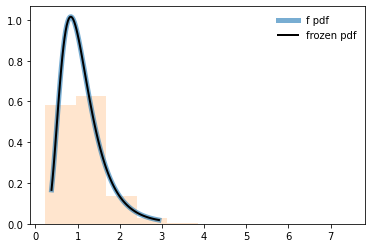

In [41]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax=plt.subplots(1, 1)

dfn, dfd=29, 18
mean, var, skew, kurt=f.stats(dfn, dfd, moments='mvsk')
print("mean=%f, var=%f, skew=%f, kurt=%f"%(mean, var, skew, kurt))

# 打印概率密度函数(probability density function,pdf)
x=np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100) #取服从自由度dfn和dfd，位于1%到99%的100个取值
ax.plot(x, f.pdf(x, dfn, dfd),'-', lw=5, alpha=0.6, label='f pdf')

# 固定分布形状，即固定自由度
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
print("验证累计分布函数CDF返回值与其PPF返回值是否相等或近似：",np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd)))

#生成服从F-分布的随机数，并打印直方图
r=f.rvs(dfn, dfd, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

* 总平方和=回归平方和+残差平方和

公式为：$SS_{tot}=\sum_{i=1}^n  ( y_{i} - \overline{y} )^{2}=SS_{reg}+SS_{res}= \sum_{i=1}^n  (\widehat{y} _{i} -    \overline{y} )^{2} + \sum_{i=1}^n  (y_{i} -   \widehat{y} _{i} )^{2} $，式中$SS_{reg}$回归平方和，其它同上。回归平方和是预测值（回归值）与观测值（真实值、实测值）均值之差的平方和，该统计量反映了自变量$x_{1}, x_{2}, \ldots ,x_{m},  $的变化引起的$y$($y_{k} (k=1,2, \ldots ,n)$)的波动，其自由度为$df_{reg}=m $，其中$m$为自变量的个数，温度与销量求解的一元一次线性方程只有一个自变量，因此其自由度为1，即只有这一个因素可以自由变化；残差平方和是观测值与预测值之差的平方和，残差的存在是由实验误差及其它因素引起的，其自由度为$df_{res}=n-m-1 $，其中$n$为样本数量，即对应的$y$的取值数量。总的离差平方和$SS_{tot}$的自由度为$n-1$。

观测值（样本）通常是给定的，因此总的离差平方和是固定的，构成总的离差平方和的因素为回归平方和和残差平方和，分布代表所求得的回归方程，或实验误差和其它因素引起$y$值得变化，当残差平方和越小（就是实验误差和其它因素影响小），则回归平方和越大，则说明所求得的回归方程的预测值越准确。


> 自由度的再讨论（参考Wikipedia）
在统计学中，自由度（defree of freedom, df）是指当以样本的统计量估计总体的参数时，样本中独立或能自由变化的数据的个数，称为该统计量的自由度。范例：
> 1. 若存在两个自变量$x$和$y$，如果$y=x+c$，其中$c$为常量，则其自由度为1，因为实际上只有$x$才能真正的自由变化，$y$会被$x$取值的不同所限制；
2. 估计总体的平均数$\mu$时，由于样本中$n$个数都是相互独立的，任一个尚未抽出的数都不受已抽出任何数值的影响，所以自由度为$n$;
3. 估计总体的方差$ \sigma ^{2} $时所使用的统计量是样本的方差$s^{2} $，而$s^{2} $必须用到样本平均数$\overline{x} $来计算，$\overline{x} $在抽样完成后已确定，所以大小为$n$的样本中只要$n-1$个数确定，第$n$个数就只有一个能使样本符合$\overline{x} $的数值。也就是说，样本中只有$n-1$个数可以自由变化，只要确定了这$n-1$个数，方差也就确定了。这里，平均数$\overline{x} $就相当于一个限制条件，由于加了这个限制条件，样本方差$s^{2} $的自由度为$n-1$；
4. 统计模型的自由度等于可自由取值的自变量的个数。如在回归方程中，如果共有$p$个参数需要估计，则其中包括了$p-1$个自变量（与截距对应的自变量是常量），因此该回归方程的自由度为$p-1$。

> 无偏估计（unbiased estimator）在统计学中，一个总体的标准差通常是由总体中随机抽取的样本的估计，样本标准差的定义为：$s= \sqrt{ \frac{ \sum_{i=1}^n  ( x_{i }- \overline{x} ) ^{2} }{n-1} } $，其中 $x_{1},  x_{2} , \ldots , x_{n} $为样本，样本容量为$n$，$\overline{x}$为样本均值。使用$n-1$替代$n$，被称为Bessel's correction（贝塞尔矫正），纠正了总体方差估计中的偏差（总体方差估计是使用随机抽取的样本的估计，不等于总体方差），以及总体标准差估计中的部分偏差，但不是全部偏差。因为偏差取决于特定的分布，不可能找到对所有总体分布无偏的标准偏差的估计。


* 方差分析（Analysis of variance, ANOVA，或变异数分析）

上述`总平方和=回归平方和+残差平方和`分析实际上是在分析因变量（总平方和，即总的离差平方和）与影响因变量变化的两个因素（或称为两个类别），即回归平方和及残差平方和的关系探索，这个过程既称之为方差分析。在求解上述回归方程之前，温度与销量的关系不一定是线性的，可能存在两种情况，一种是不管温度（$x$）取什么值，销量（$y$）都在一条水平线上下波动；二是，温度和销量存在除线性外其它类型的关系，例如非线性等。

对于上述所求得回归方程$ f_{x} =ax+b= \frac{1697}{ 454} x- \frac{8254}{227 } $（样本回归模型），对于总体而言，$F_{x} =Ax+B$（总体回归模型），斜率A约为a($A \sim a$)，截距B约为b($B \sim b$)， $\sigma ^{2} = \frac{SS_{res} }{n-2}$（无偏估计量，残差平方和有$n-2$个自由度，这是因为两个自由度与得到预测值的估计值$A$和$B$相关），$\sigma ^{2} $的平方根有时称为回归标准误差。(由残差平方和求得$\sigma ^{2} $的推导过程，可以参考'线性回归分析导论(Introduction to linear regression analysis)'，简单线性回归部分)。


总体回归方程$F_{x} =Ax+B$非常重要的特例是，$H_{0} :A=0,  H_{1} :A \neq 0$，原假设意味$x$和$y$之间不存在线性关系，$x$对解释$y$的方差几乎是无用的；如果拒绝原假设，而接受备择假设，意味$x$对解释$y$的方差是有用的，可能意味线性模型是合适的，但是也可能存在需要用高阶多项式拟合的非线性模型。对于回归显著性检验可以使用t统计量，也可以使用方差分析。回归系数检验的F统计量为：$F_{0} = \frac{ SS_{reg}/ df_{reg}  }{ SS_{res}/ df_{res}  }$ ;其中$SS_{reg}$为回归平方和，自由度$df_{reg} =m$为1，$SS_{res}$为残差平方和，其自由度$df_{res}=n-m-1$为$14-1-1=12$，（推导过程参考参考'线性回归分析导论(Introduction to linear regression analysis)'）。如果原假设成立，那么检验统计量就服从第1自由度$m=1$，第2自由度$n-m-1=12$的F分布。p-value=0.000008，小于显著性水平0.05，拒绝原假设，备择假设成立。

In [45]:
def ANOVA(observed_vals,predicted_vals,df_reg,df_res):
    import pandas as pd
    import numpy as np
    import math
    from scipy.stats import f
    '''
    function - 简单线性回归方程-回归显著性检验（回归系数检验）
    
    Paras:
    observed_vals - 观测值（实测值）
    predicted_vals - 预测值
    '''
    vals_df=pd.DataFrame({'obs':observed_vals,'pre':predicted_vals})
    #观测值的离差平方和(总平方和，或总的离差平方和)
    obs_mean=vals_df.obs.mean()
    SS_tot=vals_df.obs.apply(lambda row:(row-obs_mean)**2).sum()
    
    #残差平方和
    SS_res=vals_df.apply(lambda row:(row.obs-row.pre)**2,axis=1).sum()
   
    #回归平方和
    SS_reg=vals_df.pre.apply(lambda row:(row-obs_mean)**2).sum()
    
    print("总平方和=%.6f,回归平方和=%.6f,残差平方和=%.6f"%(SS_tot,SS_reg,SS_res))
    print("总平方和=回归平方和+残差平方和：SS_tot=SS_reg+SS_res=%.6f+%.6f=%.6f"%(SS_reg,SS_res,SS_reg+SS_res))
    
    Fz=(SS_reg/df_reg)/(SS_res/df_res)
    print("F-分布统计量=%.6f;p-value=%.6f"%(Fz,f.sf(Fz,df_reg,df_res)))

ANOVA(iceTea_df.iceTeaSales.to_list(),fx_(iceTea_df.temperature).to_list(),df_reg=1,df_res=12) 

总平方和=2203.428571,回归平方和=1812.340466,残差平方和=391.088106
总平方和=回归平方和+残差平方和：SS_tot=SS_reg+SS_res=1812.340466+391.088106=2203.428571
F-分布统计量=55.609172;p-value=0.000008


利用F检验对回归方程进行显著性检验的方法就是方程分析，将上述过程可以归结为一个方程分析表，从而更容易缕清脉络。

| 统计量        | 平方和           | 自由度  |方差 |方差比|
| ------------- |:-------------:| -----:| -----:| -----:|
| 回归      | $SS_{reg}= \sum_{i=1}^n  (\widehat{y} _{i} -    \overline{y} )^{2}$ | $df_{reg}=m $|$SS_{reg}/df_{reg}$|  $F_{0} = \frac{ SS_{reg}/ df_{reg}  }{ SS_{res}/ df_{res}  }$    |
| 残差      |$SS_{res}= \sum_{i=1}^n  (y_{i} -   \widehat{y} _{i} )^{2}   $   |  $df_{res}= n-m-1$ |$SS_{res}/df_{res}$||
| 总体 | $SS_{tot}=\sum_{i=1}^n  ( y_{i} - \overline{y} )^{2}$     |  $df_{tot}= n-1$  |||


#### 1.2.5 总体回归$Ax+b$的估计——置信区间估计
对于温度与销量的回归模型，温度为任意值时，所对应的销量不是一个固定的值，而是服从平均值为$Ax+B$（总体回归），标准差为$\sigma$的正态分布，因此在给定置信度（95%，99%等），总体回归$Ax+B$(即预测值)一定会在某个值以上，某个值以下的区间中，计算任意温度所对应销量的置信区间，是由预测值加减一个区间，该区间的计算公式为：$\sqrt{F(1,n-2;0.05) \times ( \frac{1}{n}+ \frac{ ( x_{i}- \overline{x}  )^{2} }{ S_{xx} }  ) \times   \frac{SS_{res}}{n-2}  } $，其中$n$为样本个数，$ x_{i}$为自变量（温度）样本取值，$\overline{x}$为样本均值，$S_{xx}$为自变量$x$（温度）样本的离差平方和，$SS_{res}$为残差平方和。

x prediction=64.561674;confidence interval=[60.496215,68.627133]


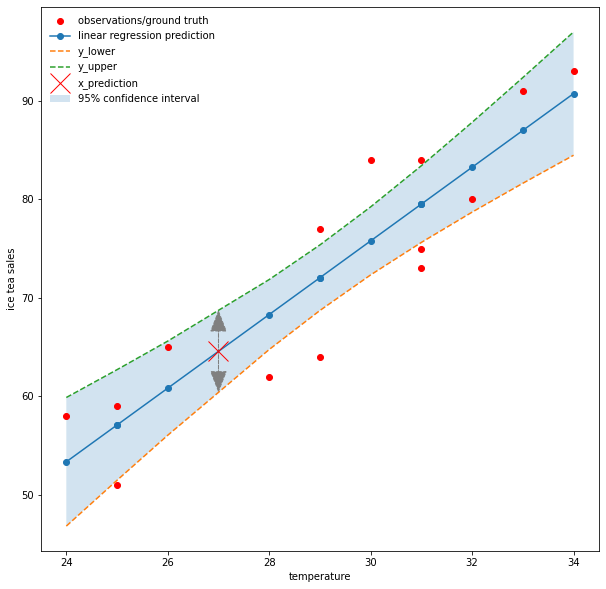

In [50]:
def confidenceInterval_estimator_LR(x,sample_num,X,y,model,confidence=0.05):
    import numpy as np
    import math
    from scipy.stats import f
    import matplotlib.pyplot as plt
    '''
    function - 简单线性回归置信区间估计，以及预测区间
    
    Paras:
    x - 自变量取值
    sample_num - 样本数量
    X - 样本数据集-自变量
    y - 样本数据集-因变量
    model -使用sklearn获取的线性回归模型
    confidence -  置信度
    '''
    X_=X.reshape(-1)
    X_mu=X_.mean()
    s_xx=(X_-X_mu)**2
    S_xx=s_xx.sum()
    ss_res=(y-LR.predict(X))**2
    SS_res=ss_res.sum()
    probability_val=f.ppf(q=1-confidence,dfn=1, dfd=sample_num-2) #dfn=1, dfd=sample_num-2
    CI=[math.sqrt(probability_val*(1/sample_num+(x-X_mu)**2/S_xx)*SS_res/(sample_num-2)) for x in X_]
    y_pre=LR.predict(X)
    
    fig, ax=plt.subplots(figsize=(10,10))
    ax.plot(X_,y,'o',label='observations/ground truth',color='r')
    ax.plot(X_,y_pre,'o-',label='linear regression prediction')
    ax.plot(X_,y_pre-CI,'--',label='y_lower')
    ax.plot(X_,y_pre+CI,'--',label='y_upper')
    ax.fill_between(X_, y_pre-CI, y_pre+CI, alpha=0.2,label='95% confidence interval')    
      
    #给定值的预测区间
    x_ci=math.sqrt(probability_val*(1/sample_num+(x-X_mu)**2/S_xx)*SS_res/(sample_num-2))
    x_pre=LR.predict(np.array([x]).reshape(-1,1))[0]
    x_lower=x_pre-x_ci
    x_upper=x_pre+x_ci
    print("x prediction=%.6f;confidence interval=[%.6f,%.6f]"%(x_pre,x_lower,x_upper))
    ax.plot(x,x_pre,'x',label='x_prediction',color='r',markersize=20)
    ax.arrow(x, x_pre, 0, x_upper-x_pre, head_width=0.3, head_length=2,color="gray",linestyle="--" ,length_includes_head=True)
    ax.arrow(x, x_pre, 0, x_lower-x_pre, head_width=0.3, head_length=2,color="gray",linestyle="--" ,length_includes_head=True)
        
    ax.set(xlabel='temperature',ylabel='ice tea sales')
    ax.legend(loc='upper left', frameon=False)    
    plt.show()                  
    return CI

sample_num=14
confidence=0.05
iceTea_df_sort=iceTea_df.sort_values(by=['temperature'])
X,y=iceTea_df_sort.temperature.to_numpy().reshape(-1,1),iceTea_df_sort.iceTeaSales.to_numpy()
CI=confidenceInterval_estimator_LR(27,sample_num,X,y,LR,confidence)    

#### 1.2.6 预测区间
给定特定值例如温度为31，则预测值为79.51，但是实际值不一定为该值，而是在置信度（置信水平，置信系数）为95%，对应的置信区间$[66.060470,92.965962]$内浮动，这个区间称为预测区间，

### 1.3 多元线性回归
包含多于一个回归变量的回归模型称为多元回归模型，如果为线性则为多元线性回归（multivariable linear regression）。在很是实际问题处理上，尤其大数据，会涉及到很多自变量，例如Sklearn机器学习库经典的鸢尾花(Iris)数据集包含的自变量有花萼长度、花萼宽度，花瓣长度和花瓣宽度(Sepal Length, Sepal Width, Petal Length and Petal Width)，总共4个，其因变量为鸢尾花的种类，如果要根据自变量与因变量建立回归模型，则需要5个参数。

#### 1.3.1 建立数据集
在应用python语言解析该部分内容时，仍然使用比较简单的数据集，用'漫画统计学之回归分析'中店铺的数据集，自变量包括店铺的面积($m^{2} $)、 最近的车站距离（m），因变量为月营业额（万元）。

In [273]:
import pandas as pd
import util
from scipy import stats

store_info={"location":['Ill.','Ky.','Lowa.','Wis.','MIch.','Neb.','Ark.','R.I.','N.H.','N.J.'],"area":[10,8,8,5,7,8,7,9,6,9],"distance_to_nearestStation":[80,0,200,200,300,230,40,0,330,180],"monthly_turnover":[469,366,371,208,246,297,363,436,198,364]}
storeInfo_df=pd.DataFrame(store_info)
util.print_html(storeInfo_df,10)

,location,area,distance_to_nearestStation,monthly_turnover
0,Ill.,10,80,469
1,Ky.,8,0,366
2,Lowa.,8,200,371
3,Wis.,5,200,208
4,MIch.,7,300,246
5,Neb.,8,230,297
6,Ark.,7,40,363
7,R.I.,9,0,436
8,N.H.,6,330,198
9,N.J.,9,180,364


#### 1.3.2 相关性分析
为了判断依据上述数据是否具有建立多元线性回归模型的意义，同样需要进行相关性分析。因为所涉及的变量增加，需要计算两两之间的相关系数，以及对应的P值，为了方便日后对此种类型数据的相关性分析，建立`correlationAnalysis_multivarialbe`函数。自变量与因变量之间的相关系数反映了自变量所能解释因变量的程度，其相关系数分别为0.8924,-0.7751，两个自变量均与因变量具有较强的相关关系，能够解释因变量，可以建立回归模型；同时，自变量之间的相关关系，可以初步判断自变量之间是否存在多重共线性，即自变量之间存在精确相关关系或高度相关关系，而使得模型估计失真，或者难以估计准确，根据计算结果两个自变量之间的相关系数为-0.4922，但是对应P值为0.1485，即拒绝原假设，说明两个自变量之间不存在线性相关关系，因此同时使用这两个自变量解释因变量，初步判断不会使回归模型失真。

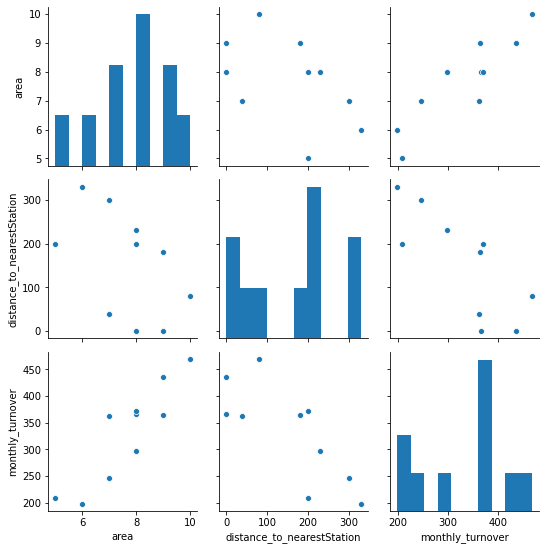

p_values:
                              area distance_to_nearestStation monthly_turnover
area                             0                     0.1485           0.0005
distance_to_nearestStation  0.1485                          0           0.0084
monthly_turnover            0.0005                     0.0084                0
______________________________________________________________________________
correlation:
                              area distance_to_nearestStation monthly_turnover
area                             1                    -0.4922           0.8924
distance_to_nearestStation -0.4922                          1          -0.7751
monthly_turnover            0.8924                    -0.7751                1


In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(storeInfo_df)
plt.show()

def correlationAnalysis_multivarialbe(df):
    from scipy.stats import pearsonr
    import pandas as pd
    '''
    function - DataFrame数据格式，成组计算pearsonr相关系数
    
    Paras:
    df - DataFrame格式数据集
    '''
    df=df.dropna()._get_numeric_data()
    df_cols=pd.DataFrame(columns=df.columns)
    p_values=df_cols.transpose().join(df_cols, how='outer')
    correlation=df_cols.transpose().join(df_cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            p_values[r][c]=round(pearsonr(df[r], df[c])[1], 4)
            correlation[r][c]=round(pearsonr(df[r], df[c])[0], 4)
            
            
    return p_values,correlation
p_values,correlation=correlationAnalysis_multivarialbe(storeInfo_df)

print("p_values:")
print(p_values)
print("_"*78)
print("correlation:")
print(correlation)

因为总共涉及到了3个变量，可以使用plotly库提供的三元图（Ternary Plot）,查看两个自变量与一个因变量之间的分布关系。可能变量之间数值的取值范围相差较大，在三元图打印时某些变量的值可能全部贴近图形边缘，无法清晰表述变量间的关系，因此使用：$\frac{ x_{i} - \overline{x} }{ x_{max}-  x_{min} } $方法分别标准化各个变量。从图示可得店铺面积（颜色表示面积）逐渐增加，月营业额逐渐增加（点的大小表示月营业额数值大小）；而最近的车站距离逐步减小时，月营业额逐渐增加。

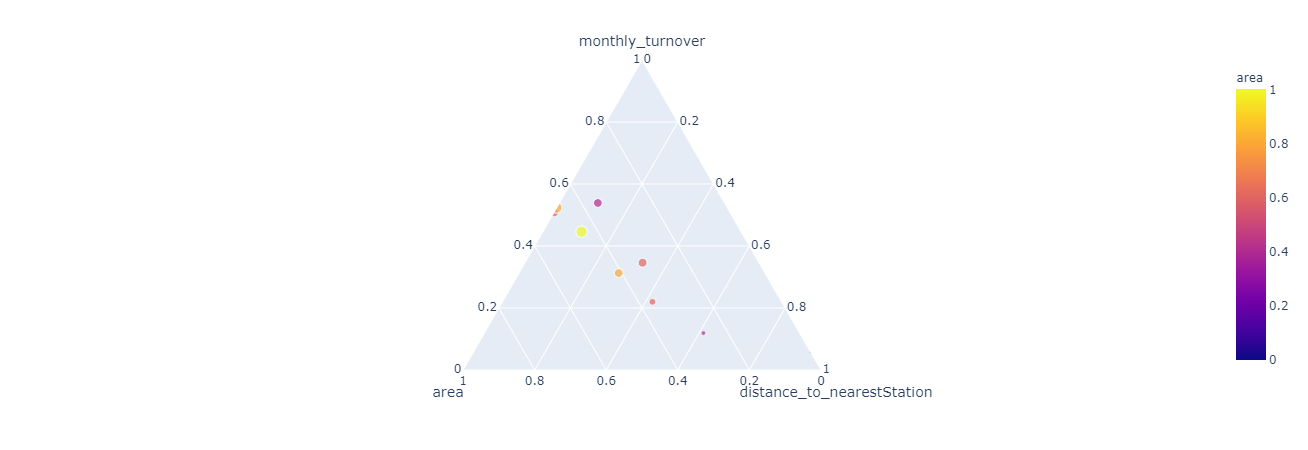

In [275]:
pd.options.mode.chained_assignment = None

columns=['area','distance_to_nearestStation','monthly_turnover']
storeInfo_plot=storeInfo_df[columns]
normalize_df=storeInfo_plot.T.apply(lambda row:(row-row.min())/(row.max()-row.min()) , axis=1).T
normalize_df["location"]=storeInfo_df.location

import plotly.express as px
fig=px.scatter_ternary(normalize_df,a="monthly_turnover", b="area",c="distance_to_nearestStation",hover_name="location",
                       color="area",size="monthly_turnover", size_max=8) 

fig.show()

#### 1.3.3 求解多元回归方程
求解多元回归方程的方法基本等同于简单线性回归求解方式，使用最小二乘法对偏回归系数进行求解。求解过程中，使用了三种方法，一是，使用sympy分别对残差平方和$SS_res$的$a1$、$a2$和$b$求微分，当各自微分的值等于0时，所反映的残差平方和为0，即观测值和预测值差值的平方和为0，而单个观测值与对应的预测值之间的差值趋于0；二是，使用矩阵计算的方式求解参数，其计算公式为：$\widehat{ \beta } = ( X^{'} X)^{-1} X^{'}Y$，其中$X=\left[\begin{matrix}1 & 10 & 80\\1 & 8 & 0\\1 & 8 & 200\\1 & 5 & 200\\1 & 7 & 300\\1 & 8 & 230\\1 & 7 & 40\\1 & 9 & 0\\1 & 6 & 330\\1 & 9 & 180\end{matrix}\right]$，$X^{'}  =\left[\begin{matrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\10 & 8 & 8 & 5 & 7 & 8 & 7 & 9 & 6 & 9\\80 & 0 & 200 & 200 & 300 & 230 & 40 & 0 & 330 & 180\end{matrix}\right]$即$X$的的转置，也可记作$X^{T} ,X^{tr} $等，$Y=\left[\begin{matrix}469\\366\\371\\208\\246\\297\\363\\436\\198\\364\end{matrix}\right]$。对于一个矩阵$X$，其逆矩阵（inverse matrix）为$X^{-1} $。使用矩阵的计算方法时，仍然是使用sympy库，该库提供了建立矩阵和矩阵计算的功能。最后一种求解多元线性回归方程的方式是直接使用`sklearn.linear_model.LinearRegression`计算，并获得回归模型。

> 偏回归系数（partial regression coefficient），是多元回归问题出现的一个特殊性质。设自变量$x_{1}, x_{2}, \ldots ,x_{m},  $，与因变量$y$具有线性关系，有$y= a_{1}  x_{1} + a_{2}  x_{2}+ \ldots + a_{n}  x_{n}+b$，则$a_{1} , a_{2} , \ldots , a_{n}  $为相对于各自变量的偏回归系数，表示当其他的各自变量都保持一定时，指定的某一自变量每变动一个单位，因变量y增加或减少的数值。 

* 对矩阵表示的求解参数公式$\widehat{ \beta } = ( X^{'} X)^{-1} X^{'}Y$再理解：

多元线性回归模型公式：$y=  \alpha  + \beta _{1} x_{1} + \beta _{2} x_{2}+  \ldots + \beta _{n} x_{n} $，可简单表示为：$Y=X \beta $，其矩阵的表示方式为：$\begin{bmatrix} Y_{1}   \\Y_{2}\\ \vdots\\Y_{n}  \end{bmatrix} = \begin{bmatrix} \alpha + \beta  X_{1}   \\\alpha + \beta  X_{2}\\ \vdots \\\alpha + \beta  X_{n}  \end{bmatrix} = \begin{bmatrix}1 &  X_{1}  \\1 &  X_{2} \\ \vdots & \vdots \\1 &  X_{n}  \end{bmatrix}  \times  \begin{bmatrix} \alpha  \\ \beta  \end{bmatrix} $，因为矩阵不能相除，因此不能直接对$Y=X \beta $两边同时除以$X$，以求取$\beta$，但是可以两边同时乘以$X$的逆矩阵避免除法（矩阵乘以自身的逆矩阵结果为1）。同时只有方阵才可能可逆，而样本的数量是无法控制的，因此用$X$乘以其转置产生一个可以求逆的方阵。

In [327]:
import sympy,math
from sympy import diff,Eq,solveset,solve,simplify,pprint,Matrix

a1,a2,b=sympy.symbols('a1 a2 b')
#计算残差平方和
storeInfo_df["ss_res"]=storeInfo_df.apply(lambda row:(row.monthly_turnover-(row.area*a1+row.distance_to_nearestStation*a2+b))**2,axis=1)
util.print_html(storeInfo_df,10)
SS_res=storeInfo_df["ss_res"].sum()

#A- 使用sympy求解多元回归方程
#对残差平方和SS_res关于a1，a1和b求微分，并使微分值为0
diff_SSres_a1=diff(SS_res,a1)
diff_SSres_a2=diff(SS_res,a2)
diff_SSres_b=diff(SS_res,b)

#当微分值为0时，解方程组，获得a1，a2和b的值
Eq_residual_a1=Eq(diff_SSres_a1,0) #设所求a1微分为0
Eq_residual_a2=Eq(diff_SSres_a2,0) #设所求a2微分为0
Eq_residual_b=Eq(diff_SSres_b,0) #设所求a2微分为0
slop_intercept=solve((Eq_residual_a1,Eq_residual_a2,Eq_residual_b),(a1,a2,b)) #计算三元一次方程组
print("diff_a1,a2 and intercept:\n")
pprint(slop_intercept)
print("_"*50)

#B - 使用矩阵（基于sympy）求解多元回归方程
if 'one' not in storeInfo_df.columns:
    X_m=Matrix(storeInfo_df.insert(loc=1,column='one',value=1)[['one','area','distance_to_nearestStation']])
else:
    X_m=Matrix(storeInfo_df[['one','area','distance_to_nearestStation']])
y_m=Matrix(storeInfo_df.monthly_turnover)

parameters_reg=(X_m.T*X_m)**-1*X_m.T*y_m #注意在矩阵计算时，矩阵相乘不能任意变化位置
print("matrix_a1,a2 and intercept:\n")
pprint(parameters_reg)

#C - 使用sklearn求解多元回归方程
#B - 使用sklearn库sklearn.linear_model.LinearRegression()，Ordinary least squares Linear Regression-普通最小二乘线性回归，获取回归方程
from sklearn.linear_model import LinearRegression
X=storeInfo_df[['area','distance_to_nearestStation']].to_numpy()
y=storeInfo_df['monthly_turnover'].to_numpy()

#拟合模型
LR_multivariate=LinearRegression().fit(X,y)
#模型参数
print("_"*50)
print("Sklearn a1=%.2f,a2=%.2f,intercept=%.2f"%(LR_multivariate.coef_[0],LR_multivariate.coef_[1], LR_multivariate.intercept_))

#建立回归方程
x1,x2=sympy.symbols('x1,x2')
fx_m=slop_intercept[a1]*x1+slop_intercept[a2]*x2+slop_intercept[b]
print("linear regression_fx=:\n")
pprint(fx_m)
fx_m=sympy.lambdify([x1,x2],fx_m,"numpy")

diff_a1,a2 and intercept:

⎧    4073344      -44597      6409648⎫
⎨a₁: ───────, a₂: ───────, b: ───────⎬
⎩     98121        130828      98121 ⎭
__________________________________________________
matrix_a1,a2 and intercept:

⎡6409648⎤
⎢───────⎥
⎢ 98121 ⎥
⎢       ⎥
⎢4073344⎥
⎢───────⎥
⎢ 98121 ⎥
⎢       ⎥
⎢-44597 ⎥
⎢───────⎥
⎣ 130828⎦
__________________________________________________
Sklearn a1=41.51,a2=-0.34,intercept=65.32
linear regression_fx=:

4073344⋅x₁   44597⋅x₂   6409648
────────── - ──────── + ───────
  98121       130828     98121 


In [278]:
#可以将矩阵打印为Latex格式的数学表达式，方便在markdown中表述，不需要自行输入。
from sympy import latex
print(latex(X_m.T))

\left[\begin{matrix}1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\10 & 8 & 8 & 5 & 7 & 8 & 7 & 9 & 6 & 9\\80 & 0 & 200 & 200 & 300 & 230 & 40 & 0 & 330 & 180\end{matrix}\right]


同样使用三元图打印两个自变量，以及预测值之间的图表，观察变量之间的关系。

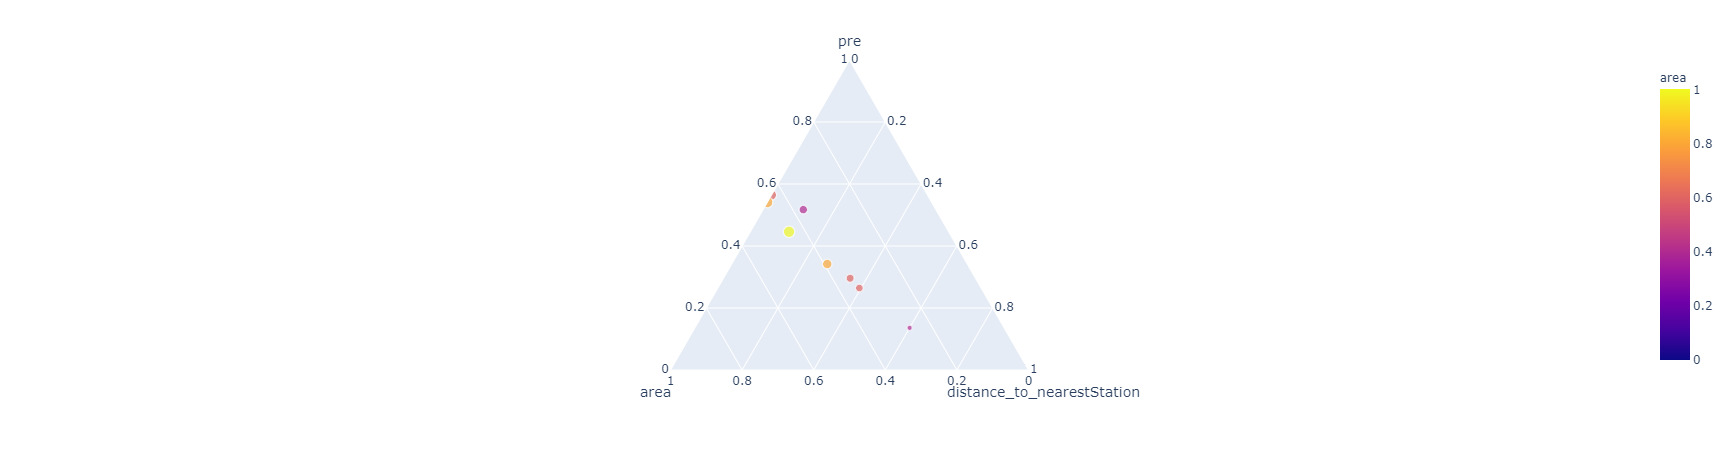

In [279]:
pd.options.mode.chained_assignment = None
storeInfo_df['pre']=LR_multivariate.predict(X)
columns=['area','distance_to_nearestStation','monthly_turnover','pre']
storeInfo_plot=storeInfo_df[columns]
normalize_df=storeInfo_plot.T.apply(lambda row:(row-row.min())/(row.max()-row.min()) , axis=1).T
normalize_df["location"]=storeInfo_df.location

import plotly.express as px
fig = px.scatter_ternary(normalize_df, a="pre", b="area",c="distance_to_nearestStation",hover_name="location",
                         color="area",size="pre", size_max=8,
                         ) 

fig.show()

#### 1.3.4 确认多元回归方程的精度
非修正自由度的判定系数计算同简单线性回归，将定义的计算函数`coefficient_of_determination`放置于'util.py'文件中，直接调用计算，同时也使用Sklearn提供的r2_score计算，其计算结果约为0.94，表示实测值与回归方程的预测值拟合程度的指标较高，能够比较好的根据店铺面积和最近车站距离预测月营业额。

In [280]:
#计算复相关系数R
import util
R_square_a,R_square_b=util.coefficient_of_determination(storeInfo_df.monthly_turnover.to_list(),storeInfo_df.pre.to_list())   
print("R_square_a=%.5f,R_square_b=%.5f"%(R_square_a,R_square_b))

from sklearn.metrics import r2_score
R_square_=r2_score(storeInfo_df.monthly_turnover.to_list(),storeInfo_df.pre.to_list())
print("using sklearn libray to calculate r2_score=",R_square_)

R_square_a=0.94524,R_square_b=0.94524
using sklearn libray to calculate r2_score= 0.945235852681711


* 修正自由度的判定系数
直接使用判定系数时，其自变量的数量越多，判定系数的值越高，但是并不是每一个自变量都是有效的，因此通常使用修正自由度的判定系数，其公式为：$R^{2} =1- \frac{  \frac{SS_{res}}{ n_{s} - n_{v} -1}  }{  \frac{SS_{tot}}{n_{s} -1}  }$，其中$n_{s}$为样本个数，$n_{v}$为自变量个数，$SS_{res}$为残差平方和，$SS_{tot}$为总的离差平方和。

In [281]:
def coefficient_of_determination_correction(observed_vals,predicted_vals,independent_variable_n):
    import pandas as pd
    import numpy as np
    import math
    '''
    function - 回归方程的修正自由度的判定系数
    
    Paras:
    observed_vals - 观测值（实测值）
    predicted_vals - 预测值
    independent_variable_n - 自变量个数
    '''
    vals_df=pd.DataFrame({'obs':observed_vals,'pre':predicted_vals})
    #观测值的离差平方和(总平方和，或总的离差平方和)
    obs_mean=vals_df.obs.mean()
    SS_tot=vals_df.obs.apply(lambda row:(row-obs_mean)**2).sum()
    
    #残差平方和
    SS_res=vals_df.apply(lambda row:(row.obs-row.pre)**2,axis=1).sum()
    
    #判断系数
    sample_n=len(observed_vals)
    R_square_correction=1-(SS_res/(sample_n-independent_variable_n-1))/(SS_tot/(sample_n-1))
            
    return R_square_correction
R_square_correction=coefficient_of_determination_correction(storeInfo_df.monthly_turnover.to_list(),storeInfo_df.pre.to_list(),2)
print("修正自由度的判定系数=",R_square_correction)

修正自由度的判定系数= 0.929588953447914


#### 1.3.5 回归显著性检验
在简单回归模型中的回归系数检验，只需要给定$H_{0} :A=0,  H_{1} :A \neq 0$，但是在多元回归中，就总体而言$F_{x} = A_{1}  x_{1} +A_{2}  x_{2}+B$，其中$A_{1} \sim  a_{1} ,A_{2} \sim  a_{2},B \sim b$，$\sim$为约为。包括$A_{1}$和 $A_{2}$两个偏相关系数，因此可以分为两种情况，一种是全面讨论偏回归系数的检验，原假设：$A_{1} =A_{2}=0$，备择假设:$A_{1} =A_{2}=0$不成立，即以下任意一组关系成立，$A_{1}  \neq 0$且$A_{2}  \neq 0$，$A_{1}  \neq 0$且$A_{2} = 0$，或$A_{1}  =0$且$A_{2}  \neq 0$。另一种是分别讨论偏回归系数的检验，例如原假设：$A_{1}  =0$，备择假设：$A_{1}  \neq 0$。在这两种方式中，检验统计量是不同的，对于全面检验，其统计量为：$F_{0}=  \frac{ SS_{tot}- SS_{res}  }{ n_{v} } / \frac{SS_{res} }{ n_{s}- n_{v}-1} $，其中$SS_{tot}$为总平方和$SS_{res}$为残差平方和，$n_{s}$为样本个数，$n_{v}$为自变量个数，;对于单个回归系数的检验，其统计量为：$F_{0}=  \frac{  a_{1} ^{2} }{ C_{jj} } / \frac{ SS_{res} }{ n_{s}- n_{v} -1 } $，其中$ C_{jj}$为$( X^{'} X)^{-1} $对角线相交位置的值，即$( X^{'} X)^{-1} =\left[\begin{matrix}\frac{511351}{98121} & - \frac{55781}{98121} & - \frac{1539}{327070}\\- \frac{55781}{98121} & \frac{6442}{98121} & \frac{66}{163535}\\- \frac{1539}{327070} & \frac{66}{163535} & \frac{67}{6541400}\end{matrix}\right]$，对角线的值为$\frac{6442}{98121} $。

对于全部回归系数的总体检验，以及单个回归系数的检验，其结果P值均小于0.05，意味着所求得的多元线性回归模型是合适的。

In [282]:
def ANOVA_multivarialbe(observed_vals,predicted_vals,independent_variable_n,a_i,X):
    import pandas as pd
    import numpy as np
    import math
    from scipy.stats import f
    from sympy import Matrix,pprint
    '''
    function - 多元线性回归方程-回归显著性检验（回归系数检验），全部回归系数的总体检验，以及单个回归系数的检验
    
    Paras:    
    observed_vals - 观测值（实测值）
    predicted_vals - 预测值
    independent_variable_n - 自变量个数
    a_i - 偏相关系数列表
    X - 样本数据集_自变量
    '''
    vals_df=pd.DataFrame({'obs':observed_vals,'pre':predicted_vals})
    #总平方和，或总的离差平方和
    obs_mean=vals_df.obs.mean()
    SS_tot=vals_df.obs.apply(lambda row:(row-obs_mean)**2).sum()
    
    #残差平方和
    SS_res=vals_df.apply(lambda row:(row.obs-row.pre)**2,axis=1).sum()
   
    #回归平方和
    SS_reg=vals_df.pre.apply(lambda row:(row-obs_mean)**2).sum()
    
    #样本个数
    n_s=len(observed_vals)
    dfn=independent_variable_n
    dfd=n_s-independent_variable_n-1
    
    #计算全部回归系数的总体检验统计量
    F_total=((SS_tot-SS_res)/dfn)/(SS_res/dfd)
    print("F-分布统计量_total=%.6f;p-value=%.6f"%(F_total,f.sf(F_total,dfn,dfd)))
    
    #逐个计算单个回归系数的检验统计量
    X=np.insert(X,0,1,1)
    X_m=Matrix(X)
    M_inverse=(X_m.T*X_m)**-1
    C_jj=M_inverse.row(1).col(1)[0]
    pprint(C_jj)
    
    F_ai_list=[]
    i=0
    for a in a_i:
        F_ai=(a**2/C_jj)/(SS_res/dfd)
        F_ai_list.append(F_ai)
        print("a%d=%.6f时，F-分布统计量_=%.6f;p-value=%.6f"%(i,a,F_ai,f.sf(F_total,1,dfd)))
        i+=1
 
a1_,a2_=LR_multivariate.coef_[0],LR_multivariate.coef_[1]
X=storeInfo_df[['area','distance_to_nearestStation']].to_numpy()
ANOVA_multivarialbe(storeInfo_df.monthly_turnover.to_list(),storeInfo_df.pre.to_list(),2,a_i=[a1_,a2_],X=X) 

F-分布统计量_total=60.410426;p-value=0.000038
 6442
─────
98121
a0=41.513478时，F-分布统计量_=44.032010;p-value=0.000110
a1=-0.340883时，F-分布统计量_=0.002969;p-value=0.000110


#### 1.3.6 总体回归$A_{1}  X_{1} + A_{2}  X_{2}+ \ldots + A_{n}  X_{n}+B$的估计——置信区间
多元线性回归模型的预测值置信区间估计使用了两种计算方式，一是，自定义函数逐步计算，其计算公式为：$\sqrt{F(1,n_s-n_v-1;0.05) \times ( \frac{1}{n_s}+ \frac{ D ^{2} }{ n_s-1 }  ) \times   \frac{SS_{res}}{n_s-n_v-1}  } $，其中$n_s$为样本个数，$n_v$为自变量个位数，$D ^{2}$为马氏距离（Mahalanobis distance）的平方，$SS_{res}$为残差平方和；$D ^{2}$马氏距离的平方计算公式为：先求$S=\begin{bmatrix} S_{11} &S_{12} & \ldots &S_{1p}  \\S_{21}  &S_{22}& \ldots &S_{2p}\\ \vdots & \vdots & \ddots & \vdots \\ S_{p1} &S_{p2}& \ldots &S_{pp}   \end{bmatrix} $的逆矩阵$S^{-1} $，其中，$S_{22}$代表第2个自变量的离差平方和，$S_{25}$代表第2个自变量和第5个自变量的离差积和，$S_{25}$与$S_{52}$是相等的，以此类推；然后根据$S^{-1}$，求取马氏距离的平方公式为：$D^{2} =[( x_{1}- \overline{ x_{1} }  )( x_{1}- \overline{ x_{1} }) S^{11} +( x_{1}- \overline{ x_{1} }  )( x_{2}- \overline{ x_{2} }) S^{12}]+ \ldots +( x_{1}- \overline{ x_{1} }  )( x_{p}- \overline{ x_{p} }) S^{1p}\\+( x_{2}- \overline{ x_{2} }  )( x_{1}- \overline{ x_{1} }) S^{21} +( x_{2}- \overline{ x_{2} }  )( x_{2}- \overline{ x_{2} }) S^{12}]+ \ldots +( x_{2}- \overline{ x_{2} }  )( x_{p}- \overline{ x_{p} }) S^{2p}\\ \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots  \ldots \\+( x_{p}- \overline{ x_{p} }  )( x_{1}- \overline{ x_{1} }) S^{p1} +( x_{p}- \overline{ x_{p} }  )( x_{2}- \overline{ x_{2} }) S^{12}]+ \ldots +( x_{p}- \overline{ x_{p} }  )( x_{p}- \overline{ x_{p} }) S^{pp}(n_s-1)$，其中$n_s$为样本个数。

二是，使用[statsmodels](https://www.statsmodels.org/stable/index.html)的`statsmodels.regression.linear_model.OLS`普通最小二乘法（Ordinary Least Squares，OLS）求得多元线性回归方程，其语法结构与Sklearn基本相同。所求的的回归模型包含有置信区间的属性，可以通过`dt=res.get_prediction(X).summary_frame(alpha=0.05)`的方式提取。可以打印statsmodels计算所得回归模型的概要（summary），比较求解回归方程的偏回归系数和截距（coef_const/area/distance_to_nearestStation ），以及确认多元回归方程的精度R-squared（$R^2$）和修正自由度的判定系数Adj. R-squared，和回归显著性检验全面讨论偏回归系数的检验F-分布统计量F-statistic，对应P值Prob (F-statistic)，全部相等，互相印证了所使用的方法是否保持一致。

对于两种方法在预测变量置信区间比较上，分别打印了各自的三维分布图，其结果显示二者的图形保持一致，即通过statsmodels求解多元回归方程与逐步计算所得结果保持一致。

> [statsmodels](https://www.statsmodels.org/stable/index.html) 提供了一些类和函数，用于估计许多不同的统计模型，以及执行统计测试和统计数据研究。每个估计器都有一个广泛的结果统计信息列表，可以用以查看相关信息，以确保所求得的估计器（模型）的准确性、正确性。


* 马氏距离（Mahalanobis distance）

马氏距离表示数据的协方差矩阵，有效计算两个未知样本集相似度的方法。与欧式距离（Euclidean distance）不同的是它考虑到各种特性之间的联系（例如身高和体重是由关联的），并且是尺度无关的（scale-invariant，例如去掉单位）,独立于测量尺度。计算公式如上所述，也可以简化表示为，对于一个均值为$ \vec{ \mu }= (  \mu _{1}, \mu _{2}, \mu _{3}, \ldots , \mu _{N} )^{T} $（即为各个自变量的均值）的多变量（多个自变量）的矩阵，$ \vec{ x }= (  x_{1}, x _{2}, x _{3}, \ldots , x _{N} )^{T}$，其马氏距离为$D_{M} (\vec{ x })= \sqrt{ (\vec{ x }-\vec{ \mu })^{T} S^{-1}  (\vec{ x }-\vec{ \mu })} $。

C:\Users\richi\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



                            OLS Regression Results                            
Dep. Variable:       monthly_turnover   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     60.41
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           3.84e-05
Time:                        11:20:05   Log-Likelihood:                -44.358
No. Observations:                  10   AIC:                             94.72
Df Residuals:                       7   BIC:                             95.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

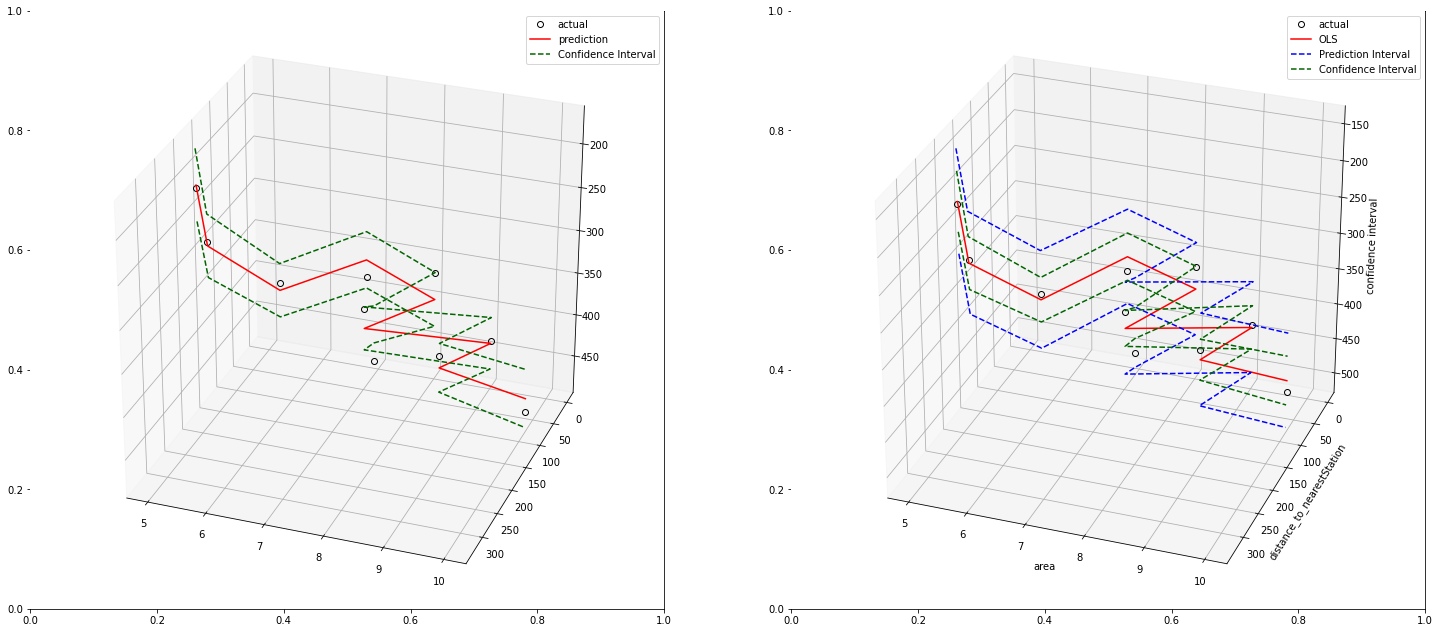

In [337]:
import numpy as np
import statsmodels.api as sm

#使用statsmodels库求解回归方程，与获得预测值的置信区间
storeInfo_df_sort=storeInfo_df.sort_values(by=['area'])
X=storeInfo_df_sort[['area','distance_to_nearestStation']]
X=sm.add_constant(X) #因为在上述逐步计算或者使用Sklearn求解回归方程过程中，多元回归方程均增加了常量截距的参数，因此此处增加一个常量 adding a constant
y=storeInfo_df_sort['monthly_turnover']
mod=sm.OLS(y,X) #构建最小二乘模型 Describe model
res=mod.fit() #拟合模型 Fit model
print(res.summary())   # Summarize model

dt=res.get_prediction(X).summary_frame(alpha=0.05)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
ym_ci_lower = dt['mean_ci_lower'] 
ym_ci_upper = dt['mean_ci_upper']

#逐步计算
def confidenceInterval_estimator_LR_multivariable(X,y,model,confidence=0.05):
    import pandas as pd
    from sympy import Matrix,pprint
    import numpy as np
    '''
    function - 多元线性回归置信区间估计，以及预测区间
    
    Paras:
    X - 样本自变量 DataFrame数据格式
    y - 样本因变量
    model - 多元回归模型
    confidence - 置信度
    
    return:
    CI- 预测值的置信区间
    '''
    #根据指定数目，划分列表的函数
    def chunks(lst, n):
        for i in range(0, len(lst), n):
            yield lst[i:i + n]
    
    X_deepCopy=X.copy(deep=True) #如果不进行深度拷贝，如果传入的参数变量X发生了改变，则该函数外部的变量值也会发生改变
    columns=X_deepCopy.columns
    n_v=len(columns)
    n_s=len(y)
    
    #求S，用于马氏距离的计算
    SD=[]
    SD_name=[]
    for col_i in columns:
        i=0
        for col_j in columns:
            SD_column_name=col_i+'S'+str(i)
            SD_name.append(SD_column_name)
            if col_i==col_j:
                X_deepCopy[SD_column_name]=X_deepCopy.apply(lambda row: (row[col_i]-X_deepCopy[col_j].mean())**2,axis=1)
                SD.append(X_deepCopy[SD_column_name].sum())
            else:
                X_deepCopy[SD_column_name]=X_deepCopy.apply(lambda row: (row[col_i]-X_deepCopy[col_i].mean())*(row[col_j]-X_deepCopy[col_j].mean()),axis=1)
                SD.append(X_deepCopy[SD_column_name].sum())                
            i+=1
    M=Matrix(list(chunks(SD,n_v)))
    
    #求S的逆矩阵
    M_invert=M**-1
    #pprint(M_invert)
    M_invert_list=[M_invert.row(row).col(col)[0] for row in range(n_v) for col in range(n_v)]
    X_mu=[X_deepCopy[col].mean() for col in columns]
    
    #求马氏距离的平方
    SD_array=X_deepCopy[SD_name].to_numpy()    
    D_square_list=[sum([x*y for x,y in zip(SD_selection,M_invert_list)])*(n_s-1) for SD_selection in SD_array]    
    
    #计算CI-预测值的置信区间
    print(columns)
    ss_res=(y-model.predict(X_deepCopy[columns]))**2
    SS_res=ss_res.sum()
    print(SS_res)
    probability_val=f.ppf(q=1-confidence,dfn=1, dfd=n_s-n_v-1) 
    CI=[math.sqrt(probability_val*(1/n_s+D_square/(n_s-1))*SS_res/(n_s-n_v-1)) for D_square in D_square_list]

    return CI

X_=storeInfo_df_sort[['area','distance_to_nearestStation']]
y_=storeInfo_df_sort['monthly_turnover']
CI=confidenceInterval_estimator_LR_multivariable(X_,y_,LR_multivariate,confidence=0.05)

#打印图表
fig, axs=plt.subplots(1,2,figsize=(25,11))
x_=X.area
y_=X.distance_to_nearestStation

#由自定义函数，逐步计算获得的置信区间
axs[0]=fig.add_subplot(1,2,1, projection='3d')
axs[0].plot(x_,y_, y, linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",label = "actual")
X_array=X_.to_numpy()
LR_pre=LR_multivariate.predict(X_array)
axs[0].plot(x_, y_,LR_pre, color = "red",label = "prediction")
axs[0].plot(x_,y_, LR_pre+CI, color = "darkgreen", linestyle = "--", label = "Confidence Interval")
axs[0].plot(x_,y_, LR_pre-CI, color = "darkgreen", linestyle = "--")

#由statsmodels库计算所得的置信区间
axs[1]=fig.add_subplot(1,2,2, projection='3d')
axs[1].plot(x_,y_, y, linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",label = "actual")
axs[1].plot(x_, y_,y_prd, color = "red",label = "OLS")
axs[1].plot(x_, y_,yprd_ci_lower, color = "blue", linestyle = "--",label = "Prediction Interval")
axs[1].plot(x_, y_,yprd_ci_upper, color = "blue", linestyle = "--")

axs[1].plot(x_,y_, ym_ci_lower, color = "darkgreen", linestyle = "--", label = "Confidence Interval")
axs[1].plot(x_,y_, ym_ci_upper, color = "darkgreen", linestyle = "--")

axs[1].view_init(210,250) #可以旋转图形的角度，方便观察
axs[1].set_xlabel('area')
axs[1].set_ylabel('distance_to_nearestStation')
axs[1].set_zlabel('confidence interval')

axs[0].legend()
axs[1].legend()
axs[0].view_init(210,250) #可以旋转图形的角度，方便观察
axs[1].view_init(210,250) #可以旋转图形的角度，方便观察
plt.show()

### 1.4 要点
#### 1.4.1 数据处理技术

* 使用sympy库建立方程，求解方程组，以及微分、矩阵计算；使用sympy的pprint打印方程及变量

* 用机器学习库[Sklearn](https://scikit-learn.org/stable/)，以及[statsmodels](https://www.statsmodels.org/stable/index.html)求解回归方程，以及计算模型精度（判定系数）、回归模型的显著性检验。

* 用plotly库的`px.scatter_ternary`，或者matplotlib库的`projection='3d'`方式，表述有三个变量的关系

#### 1.4.2 新建立的函数

* function - 在matplotlib的子图中绘制连接线，`demo_con_style(a_coordi,b_coordi,ax,connectionstyle)`

* function - 回归方程的判定系数， `coefficient_of_determination(observed_vals,predicted_vals)`

* function - 简单线性回归方程-回归显著性检验（回归系数检验）， `ANOVA(observed_vals,predicted_vals,df_reg,df_res)`

* function - 简单线性回归置信区间估计，以及预测区间， `confidenceInterval_estimator_LR(x,sample_num,X,y,model,confidence=0.05)`

* function - DataFrame数据格式，成组计算pearsonr相关系数，`correlationAnalysis_multivarialbe(df)`

* function - 回归方程的修正自由度的判定系数， `coefficient_of_determination_correction(observed_vals,predicted_vals,independent_variable_n)`

* function - 多元线性回归方程-回归显著性检验（回归系数检验），全部回归系数的总体检验，以及单个回归系数的检验， `ANOVA_multivarialbe(observed_vals,predicted_vals,independent_variable_n,a_i,X)`

* function - 多元线性回归置信区间估计，以及预测区间， `confidenceInterval_estimator_LR_multivariable(X,y,model,confidence=0.05)`

#### 1.4.3 所调用的库

In [338]:
import sympy
from sympy import Symbol
from sympy import diff
from sympy import init_printing,pprint,sqrt
from sympy import ln,log,Eq
from sympy import Matrix
from sympy import Eq,solveset,solve,simplify
from sympy import latex

import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import cm

import math
import pandas as pd

from scipy import stats
from scipy.stats import f
from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import r2_score

import statsmodels.api as sm

#### 1.4.4 参考文献
1. [日]高桥 信著作,Inoue Iroha,株式会社 TREND-PRO漫画制作,张仲恒译.漫画统计学之回归分析[M].科学出版社.北京.2009.08；
2. Timothy C.Urdan.Statistics in Plain English(白话统计学)[M].中国人民大学出版社.2013,12.第3版.
3. Douglas C.Montgomery,Elizabeth A.Peck,G.Geoffrey Vining著.王辰勇译.线性回归分析导论(Introduction to linear regression analysis).机械工业出版社.2016.04(第5版)